In [1]:
# 1). Reading data from .csv (Comma Separated Value) file into DataFrame using pandas 
import pandas as pd
import numpy as np
import os

# Define the folder path and file name
Folder_path = r"C:\Users\Lenovo\INSAID-Fraud-Detection-Model-for-Financial-Transactions"
file_name = "Fraud.csv"

# Combine the folder path and file name into a full file path
full_path = os.path.join(Folder_path, file_name)

def Reading_file(full_path):
    # Check if the file exists
    if os.path.exists(full_path):
        print("File Exists")  
        print("Reading file into dataframe.")    
        # Read the file into a DataFrame
        df = pd.read_csv(full_path)   
        return df
        # Display the first few rows of the DataFrame
    else:
        print('File doesn\'t exist')
df = Reading_file(full_path)
print(df.head())

File Exists
Reading file into dataframe.
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [2]:
# 2). Check the numerical and categorical features and find the missing values in DataFrame.
Column_Name = df.columns
print("Column Name in the fraud.csv file, Total Column : ",len(Column_Name))
print(Column_Name)

# Identify numerical features
numerical_features = df.select_dtypes(include=['int', 'float']).columns
num_numerical_features = len(numerical_features)
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
num_categorical_features = len(categorical_features)

print("Number of numerical features:", num_numerical_features)
print("Numerical Feature Column Name: ",numerical_features)
print("Number of categorical features:", num_categorical_features)
print("categorical Feature Column Name: ",categorical_features)
#Find the number of missing values in Pandas
#NaN (Not a Number) and None are treated as missing values in Pandas.
print(df.isna().sum())

Column Name in the fraud.csv file, Total Column :  11
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
Number of numerical features: 8
Numerical Feature Column Name:  Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
Number of categorical features: 3
categorical Feature Column Name:  Index(['type', 'nameOrig', 'nameDest'], dtype='object')
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


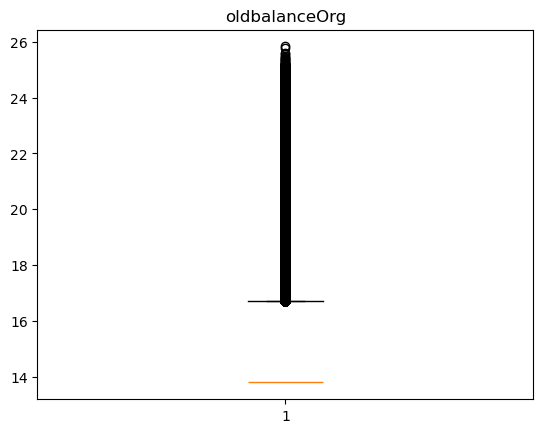

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


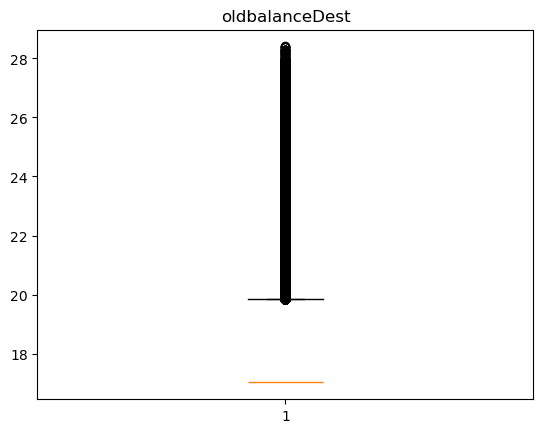

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


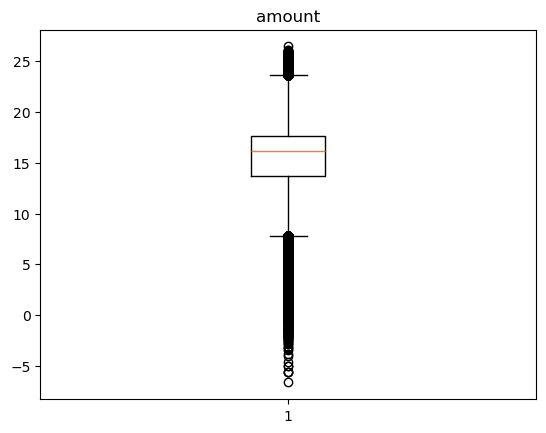

In [3]:
# Hence, there is no null value present in the column so data cleaning is not required in this case

# 3). Plotting the outlier using the matplotlib library 
# Hence the data is large converting column values to logarithmic values for better analysis of the 
# data distribution of column ['oldbalanceOrg','oldbalanceDest','amount']

import matplotlib.pyplot as plt
item = ['oldbalanceOrg','oldbalanceDest','amount']

def Plot_outlier(df,item):
    for i in item:
        # Creating plot for column oldbalanceOrg
        # Hist, Bar: plt.bar(df['step'],df[i]), Box plot 
        plt.boxplot(np.log2(df[i]))
        plt.title(i)
        # show plot
        plt.show()
        
Plot_outlier(df,item)

In [4]:
# 4). Analysis of data of Column 'type' in the data frame
# Here, the Categorical column type of transaction is important Whereas other Categorical columns
# like 'nameOrig', 'nameDest' Don't contain any significance towards the model training, analysis, prediction
unique_values = df['type'].unique()
print("Unique Value in Column type is ",unique_values)
print("Count of unique value in column ")
print(df['type'].value_counts())

Unique Value in Column type is  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Count of unique value in column 
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [5]:
# There are 5 unique values in the column 'type'.
# Count of fraud and non-fraud cases in the various types of transaction 
type_of_trans = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
# Count fraud and non-fraud cases for each transaction type
fraud_counts = df[df['isFraud'] == 1].groupby('type').size().reindex(type_of_trans, fill_value=0)
non_fraud_counts = df[df['isFraud'] == 0].groupby('type').size().reindex(type_of_trans, fill_value=0)
# Create a summary DataFrame
summary_df = pd.DataFrame({'Transaction Type': type_of_trans,'Fraud Cases': fraud_counts.values,'Non-Fraud Cases': non_fraud_counts.values})
print("Count of Fraud and Non-Fraud Cases by Transaction Type:")
print(summary_df)

Count of Fraud and Non-Fraud Cases by Transaction Type:
  Transaction Type  Fraud Cases  Non-Fraud Cases
0          PAYMENT            0          2151495
1         TRANSFER         4097           528812
2         CASH_OUT         4116          2233384
3            DEBIT            0            41432
4          CASH_IN            0          1399284


TRANSFER Fraud Cases:
Min Amount: 63.8, Max Amount: 10000000.0, Mean Amount: 1480891.6729338542

CASH_OUT Fraud Cases:
Min Amount: 0.0, Max Amount: 10000000.0, Mean Amount: 1455102.5859645286


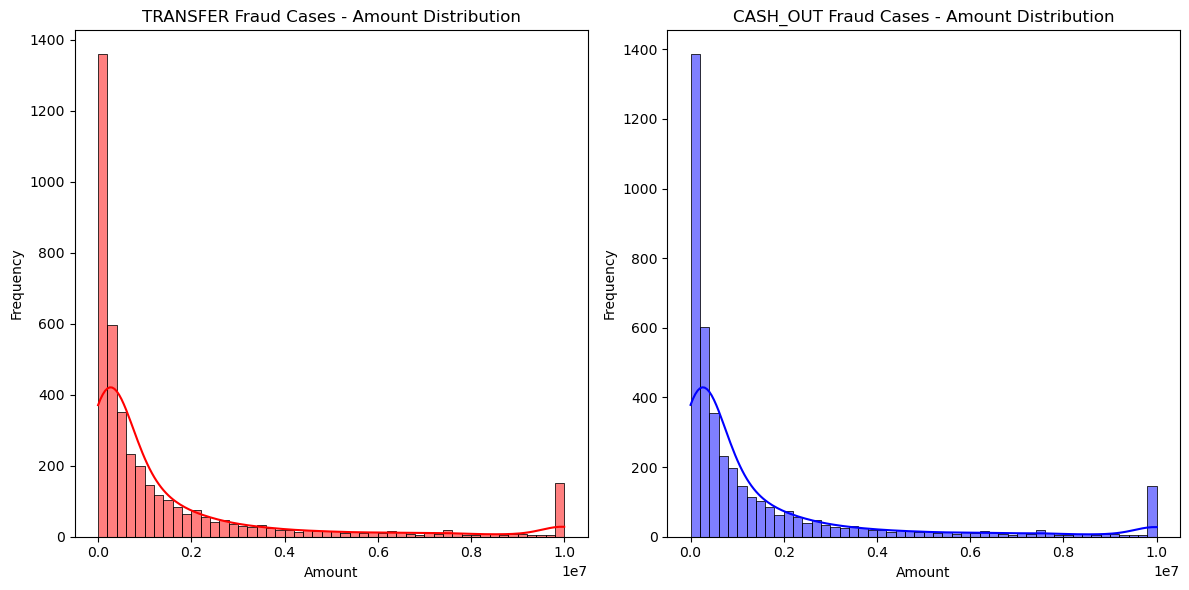

In [6]:
# Here is some interesting insight from the data of column 'type' 
# Transaction type TRANSFER, CASH_OUT are most prone to get fraud whereas 
# Other types of transactions 'PAYMENT', 'DEBIT', and 'CASH_IN' doesn't have any fraud cases reported
# 5). Plotting histogram to further analysis of fraud case in TRANSFER, CASH_OUT, Also finding min, max, 
# and mean of amount column that is fraud in TRANSFER, CASH_OUT
import seaborn as sns

def Amount_dis(df):
    # Filter fraud cases for TRANSFER and CASH_OUT
    fraud_transfer = df[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]
    fraud_cash_out = df[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]
    
    # Calculate min, max, and mean for TRANSFER fraud cases
    transfer_min = fraud_transfer['amount'].min()
    transfer_max = fraud_transfer['amount'].max()
    transfer_mean = fraud_transfer['amount'].mean()
    
    # Calculate min, max, and mean for CASH_OUT fraud cases
    cash_out_min = fraud_cash_out['amount'].min()
    cash_out_max = fraud_cash_out['amount'].max()
    cash_out_mean = fraud_cash_out['amount'].mean()
    
    print("TRANSFER Fraud Cases:")
    print(f"Min Amount: {transfer_min}, Max Amount: {transfer_max}, Mean Amount: {transfer_mean}")
    
    print("\nCASH_OUT Fraud Cases:")
    print(f"Min Amount: {cash_out_min}, Max Amount: {cash_out_max}, Mean Amount: {cash_out_mean}")
    
    # Plot histograms separately
    plt.figure(figsize=(12, 6))
    
    # Histogram for TRANSFER fraud cases
    plt.subplot(1, 2, 1)
    sns.histplot(fraud_transfer['amount'], bins=50, color='red', kde=True)
    plt.title('TRANSFER Fraud Cases - Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    
    # Histogram for CASH_OUT fraud cases
    plt.subplot(1, 2, 2)
    sns.histplot(fraud_cash_out['amount'], bins=50, color='blue', kde=True)
    plt.title('CASH_OUT Fraud Cases - Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
Amount_dis(df)

In [7]:
# 6). Handling Multi-Collinearity and finding the correlation coefficient between the columns To do the same
# i). First Converting Categorical column to Numerical value data 
# ii). For this use One-Hot Encoding which will split one categorical column to the number of unique values present in that respective columns
# In this Data frame, there are 3 categorical columns ['type', 'nameOrig', 'nameDest']. The nameOrig and nameDest is just the names of the 
# transmitter and receiver but the type of transaction has major significance towards the model training, prediction 
# and the amount distribution which is getting fraudulent

from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df):
    # Creating copy of the data frame for safer side
    data = df.copy()
    categorical_columns = ['type']
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(data[categorical_columns])
    one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
    data_encoded = pd.concat([data, one_hot_data], axis=1)
    data_encoded = data_encoded.drop(categorical_columns, axis=1)
    # Getting Modified categorical Column 
    mod_cat_col = data_encoded.columns
    return data_encoded

data_encoded = OneHotEncoding(df)
print(f"Encoded Employee data : \n{data_encoded.head()}")

Encoded Employee data : 
   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
0             0.0             0.0        0               0           0.0   
1             0.0             0.0        0               0           0.0   
2             0.0             0.0        1               0           0.0   
3         21182.0             0.0        1               0           0.0   
4             0.0             0.0        0               0           0.0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_

                  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
amount          1.000000      -0.002762       -0.007861        0.294137   
oldbalanceOrg  -0.002762       1.000000        0.998803        0.066243   
newbalanceOrig -0.007861       0.998803        1.000000        0.067812   
oldbalanceDest  0.294137       0.066243        0.067812        1.000000   
newbalanceDest  0.459304       0.042029        0.041837        0.976569   
isFraud         0.076688       0.010154       -0.008148       -0.005885   
isFlaggedFraud  0.012295       0.003835        0.003776       -0.000513   
type_CASH_IN   -0.009621       0.506761        0.527373        0.076105   
type_CASH_OUT  -0.004376      -0.200899       -0.210977        0.086028   
type_DEBIT     -0.023379      -0.021450       -0.021872        0.009347   
type_PAYMENT   -0.197444      -0.189486       -0.193915       -0.231455   
type_TRANSFER   0.365896      -0.081593       -0.087355        0.130476   

                newbalan

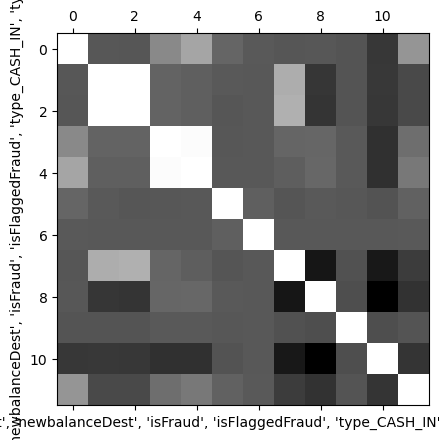

Sorted Maximum Correlation Values:
oldbalanceOrg has maximum correlation with newbalanceOrig: 0.9988
newbalanceOrig has maximum correlation with oldbalanceOrg: 0.9988
oldbalanceDest has maximum correlation with newbalanceDest: 0.9766
newbalanceDest has maximum correlation with oldbalanceDest: 0.9766
type_CASH_IN has maximum correlation with newbalanceOrig: 0.5274
amount has maximum correlation with newbalanceDest: 0.4593
type_TRANSFER has maximum correlation with amount: 0.3659
type_CASH_OUT has maximum correlation with newbalanceDest: 0.0935
isFraud has maximum correlation with amount: 0.0767
isFlaggedFraud has maximum correlation with isFraud: 0.0441
type_DEBIT has maximum correlation with oldbalanceDest: 0.0093
type_PAYMENT has maximum correlation with isFlaggedFraud: -0.0011


In [8]:
# 7). Finding Correlation among the Columns Using the Pearson method (Using function pandas corr()), 
# Using Numeric values to find the Correlation
# Any NaN values are automatically excluded. To ignore any non-numeric values, use the parameter numeric_only = True
# Here not including the 2 categorical columns ['nameOrig', 'nameDest'] for further analysis so
mod_num_col = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
               'newbalanceDest', 'isFraud','isFlaggedFraud', 'type_CASH_IN', 
               'type_CASH_OUT', 'type_DEBIT','type_PAYMENT', 'type_TRANSFER']

def Correl_matrix(data_encoded,mod_num_col):
    data_mod_encoded = data_encoded[mod_num_col]
    corr_matrix = data_mod_encoded.corr(method='pearson')
    return corr_matrix

corr_matrix = Correl_matrix(data_encoded,mod_num_col)
print(corr_matrix)

# Sorting or plotting the correlation between the different column
plt.matshow(corr_matrix, cmap=plt.cm.gray)
plt.xlabel(mod_num_col)
plt.ylabel(mod_num_col)
plt.show()

# Create a DataFrame to store the correlation values
corr_df = pd.DataFrame(corr_matrix)
# Initialize a dictionary to store the maximum correlation values and corresponding column names
max_corr_dict = {}
# Iterate through the correlation matrix to find the maximum correlation for each column
for col in corr_df.columns:
    max_corr = corr_df[col].drop(col).max()  # Exclude self-correlation
    max_corr_col = corr_df[col].drop(col).idxmax()
    max_corr_dict[col] = (max_corr_col, max_corr)
# Sort the dictionary by maximum correlation values in descending order
sorted_max_corr = sorted(max_corr_dict.items(), key=lambda x: x[1][1], reverse=True)
# Display the sorted results
print("Sorted Maximum Correlation Values:")
for col, (max_col, max_val) in sorted_max_corr:
    print(f"{col} has maximum correlation with {max_col}: {max_val:.4f}")

In [9]:
# By plotting the correlation matrix in grayscale, the color code for black is 0 and 
# the color code for white is 255 in grayscale
# This Correlation matrix looks fairly good, therefore the Correlation between the 
# same column is high like corr between the amount-amount column is 1 high positive Correlation. 
# This means that we can find the highly correlated column positively or negatively to 
# each other or with the target column. On this basis, we can verify/make various assumptions that 
# hold for further model analysis.

# 8). Getting Variance Inflation Factor (VIF) to check for multi-collinearity 
# A variance inflation factor (VIF) measures multicollinearity among the independent variables in a multiple regression model.
# VIF Interpretation: VIF > 5 or 10 indicates high multicollinearity, and you may consider dropping the variable.
# This approach helps you decide which variables to drop based on redundancy.

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_encoded[mod_num_col]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

           feature         VIF
0           amount    4.070943
1    oldbalanceOrg  669.074835
2   newbalanceOrig  688.656291
3   oldbalanceDest   68.524775
4   newbalanceDest   78.925382
5          isFraud    1.225252
6   isFlaggedFraud    1.002818
7     type_CASH_IN    2.180069
8    type_CASH_OUT    1.107247
9       type_DEBIT    1.001438
10    type_PAYMENT    1.001904
11   type_TRANSFER    1.242269


In [10]:
# As per the analysis of multicollinearity using variance_inflation_factor(VIF), need to remove the below feature to avoid redundancy in the model
# 1   oldbalanceOrg  669.074835
# 2   oldbalanceDest   68.524775
# Now as per VIF Interpretation the dropped column will be  newbalanceOrig,newbalanceDest 
# Again finding the VIF for the remaining columns to check the multicollinearity

mod_num_col = ['amount', 'oldbalanceOrg', 'oldbalanceDest',
                'isFraud','isFlaggedFraud', 'type_CASH_IN', 
                'type_CASH_OUT', 'type_DEBIT','type_PAYMENT', 'type_TRANSFER']
X = data_encoded[mod_num_col]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0          amount  1.257448
1   oldbalanceOrg  1.347950
2  oldbalanceDest  1.136286
3         isFraud  1.010589
4  isFlaggedFraud  1.002057
5    type_CASH_IN  1.507540
6   type_CASH_OUT  1.088977
7      type_DEBIT  1.001412
8    type_PAYMENT  1.000456
9   type_TRANSFER  1.237795


In [11]:
# Here the VIF is less than 5, and hence mod_num_col is the new feature to analysis the model
# Now the new dataframe, feature for Splittng and training model
New_mod_feature_col = ['amount', 'oldbalanceOrg', 'oldbalanceDest',
                'isFraud','isFlaggedFraud', 'type_CASH_IN', 
                'type_CASH_OUT', 'type_DEBIT','type_PAYMENT', 'type_TRANSFER']

New_df = data_encoded[New_mod_feature_col]
# Here is the count of target column value count where 0 is not fraud, 1 is fraud
# Model Training: as observed isFraud column there is a class imbalance which means
# Fraud transactions were much lower than non-fraudulent ones

# 9) Splitting data for the training and testing of the different model

from sklearn.model_selection import train_test_split
X = New_df[New_mod_feature_col]
X = X.drop('isFraud',axis=True)
y = New_df[['isFraud']]
print(y.value_counts())

isFraud
0          6354407
1             8213
Name: count, dtype: int64


In [12]:
# 10). Model Building using Logistic Regression which is used for regression and classification problems

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def LogisticRegression_model(X_train, X_test, y_train, y_test):
    # Initialize and train the Logistic Regression model
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = log_reg.predict(X_test)
    # Evaluate the model
    # Accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    # Classification Report:
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

In [13]:
# Using simple train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression_model(X_train, X_test, y_train, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9987
Confusion Matrix:
[[1270903       1]
 [   1603      17]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.94      0.01      0.02      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.51      0.51   1272524
weighted avg       1.00      1.00      1.00   1272524



In [14]:
# Using stratified sampling to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
LogisticRegression_model(X_train, X_test, y_train, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9987
Confusion Matrix:
[[1270881       0]
 [   1630      13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      0.01      0.02      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.50      0.51   1272524
weighted avg       1.00      1.00      1.00   1272524



In [15]:
#11). Feature Scaling As we are aware Logistic Regression is sensitive to the scaling of the input features.
#i).  Using StandardScaler for the input feature scaling for further analysis

# Using stratified sampling to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Class Imbalance: If your dataset has imbalanced classes (e.g., very few fraud cases 
# compared to non-fraud cases), consider using techniques like oversampling, undersampling, 
# or adjusting the class_weight parameter in LogisticRegression.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Using StandardScaler for feature scaling with class_weight='balanced' in LogisticRegression model")
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

def Evaluation_matix(y_pred,y_test):
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)
    
Evaluation_matix(y_pred,y_test)

#ii). Using MinMaxScaler from sklearn.preprocessing
# Using stratified sampling to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Class Imbalance: If your dataset has imbalanced classes (e.g., very few fraud cases 
# compared to non-fraud cases), consider using techniques like oversampling, undersampling, 
# or adjusting the class_weight parameter in LogisticRegression.

from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Using MinMaxScaler for feature scaling with class_weight='balanced' in LogisticRegression model")
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
Evaluation_matix(y_pred,y_test)

Using StandardScaler for feature scaling with class_weight='balanced' in LogisticRegression model


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9346
Confusion Matrix:
[[1187768   83113]
 [     91    1552]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97   1270881
           1       0.02      0.94      0.04      1643

    accuracy                           0.93   1272524
   macro avg       0.51      0.94      0.50   1272524
weighted avg       1.00      0.93      0.96   1272524

Using MinMaxScaler for feature scaling with class_weight='balanced' in LogisticRegression model


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9204
Confusion Matrix:
[[1169837  101044]
 [    191    1452]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270881
           1       0.01      0.88      0.03      1643

    accuracy                           0.92   1272524
   macro avg       0.51      0.90      0.49   1272524
weighted avg       1.00      0.92      0.96   1272524



Gini Model Evaluation:
Accuracy: 0.9989
Confusion Matrix:
[[1270540     364]
 [    992     628]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.63      0.39      0.48      1620

    accuracy                           1.00   1272524
   macro avg       0.82      0.69      0.74   1272524
weighted avg       1.00      1.00      1.00   1272524

Entropy Model Evaluation:
Accuracy: 0.9989
Confusion Matrix:
[[1270500     404]
 [    939     681]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.63      0.42      0.50      1620

    accuracy                           1.00   1272524
   macro avg       0.81      0.71      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



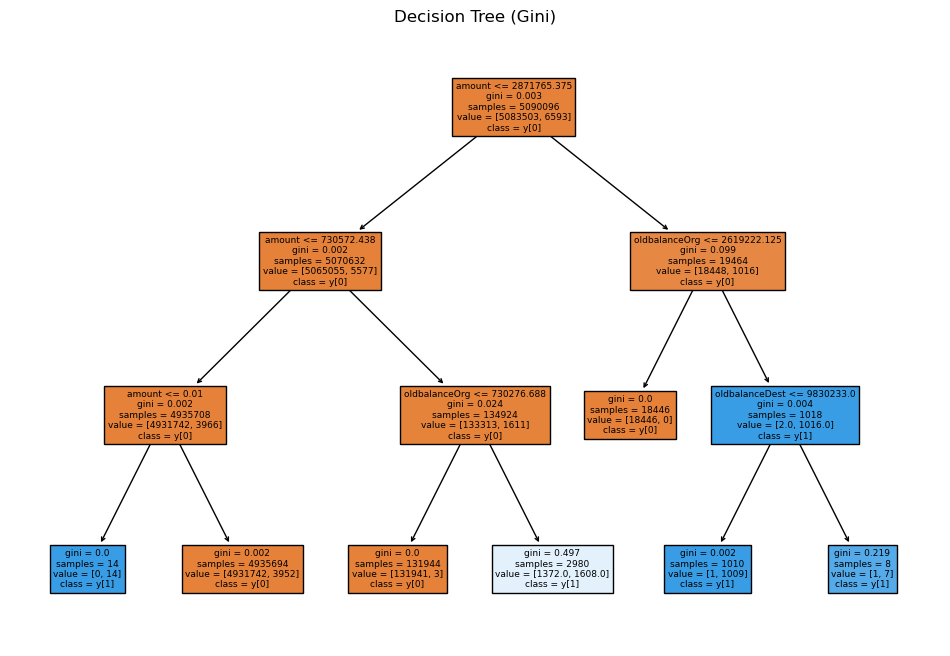

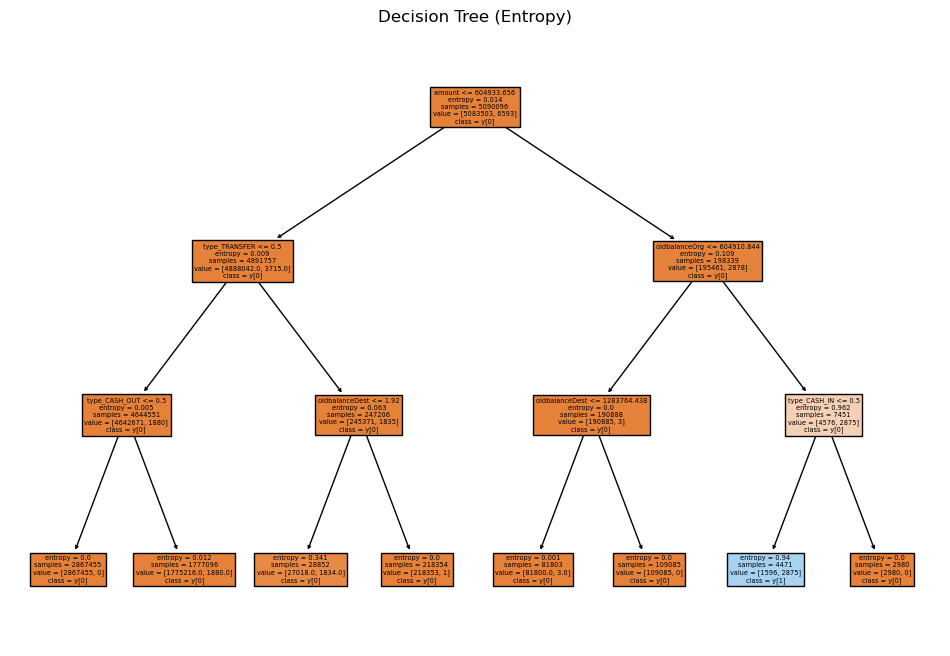

In [16]:
# As seen in the above result here is the interesting insight which is as follows:
# a).  Using simple train_test_split the Accuracy score achieved of 0.9987
# b).  Using stratified sampling to handle class imbalance the Accuracy score achieved of 0.9987
# i).  StandardScaler: Using this feature scaling the Accuracy score: of 0.9346 significantly decreases as compared with the above model(a,b)
# ii). MinMaxScaler:   Using this feature scaling the Accuracy score: of 0.9204 significantly decreases as compared with the above model(a,b)

# 12) Creating Model Selection 'Decision Tree'

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Using simple train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the classifier object with Gini criterion
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
# Performing training
clf_gini.fit(X_train, y_train)

# Decision tree with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
# Performing training
clf_entropy.fit(X_train, y_train)

# Predictions using Gini model
y_pred_gini = clf_gini.predict(X_test)

# Predictions using Entropy model
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluation of the Gini model
print("Gini Model Evaluation:")
Evaluation_matix(y_pred_gini,y_test)

# Evaluation of the Entropy model
print("Entropy Model Evaluation:")
Evaluation_matix(y_pred_entropy,y_test)

# Visualizing the Decision Tree (Gini)
plt.figure(figsize=(12,8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree (Gini)")
plt.show()

# Visualizing the Decision Tree (Entropy)
plt.figure(figsize=(12,8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree (Entropy)")
plt.show()

# Model Training and Prediction: Two models are trained: one using the Gini impurity criterion and 
# the other using the Entropy criterion and predictions are made using both models.
# Model Evaluation: Both models are evaluated using a confusion matrix, accuracy, and classification report.
# Visualization: The decision trees for both models are visualized using plot_tree from sklearn.tree.

In [17]:
# 13). Creating Model Selection: Evaluated RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def RandomForestClassifier_Model(X_train,y_train,X_test):
    # Initialize RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Fit the classifier to the training data
    rf_classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_classifier.predict(X_test)
    return y_pred

y_pred = RandomForestClassifier_Model(X_train,y_train,X_test)
print("Random Forest Classifier Model Evaluation:")
Evaluation_matix(y_pred,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Classifier Model Evaluation:
Accuracy: 0.9996
Confusion Matrix:
[[1270809      95]
 [    413    1207]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.93      0.75      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.87      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [18]:
# The Random Forest Classifier Model has an Accuracy score of 0.9996 which is better than the above-trained model
# Random Forest Classifier Model takes a huge amount of time and memory usage as compared with other models

# 14). Creating Model Selection: XGBOOST model for training 
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Converting Dataset into Dmatrix : XGBoost presents the DMatrix class, which optimizes speed and memory for effective dataset storage. 
# To use the XGBoost API, datasets must be converted to this format. Labels and training features are both accepted by DMatrix. 
# enable_categorical is set to True to encrypt Pandas category columns automatically.

def XGboost_model(X_train, y_train,X_test, y_test):
    xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
    xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)
    
    n=50
    params = {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.1,}
    model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)
    # The code initializes an XGBoost model with hyperparameters like a binary logistic objective, 
    # a maximum tree depth of 3, and a learning rate of 0.1.
    # It then trains the model using the `xgb_train` dataset for 50 boosting rounds.
    
    y_pred = model.predict(xgb_test)
    y_pred = y_pred.astype(int)
    accuracy = accuracy_score(y_test,y_pred)
    print('Accuracy of the model is:', accuracy)

XGboost_model(X_train, y_train,X_test, y_test)

Accuracy of the model is: 0.9987269395311994


In [19]:
# The XGBOOST Model has an Accuracy score of 99.87269395311993 which is not better than the Random forest model
# 15). Feature Engineering
Created new feature balance_change = oldbalanceOrg - newbalanceOrig.
Derived transaction_speed = amount / step to detect fast withdrawals.

isFlaggedFraud: Business rule-based flag for illegal transactions.


# 16). Using GridSearchCV for hyperparameter tuning for the trained model 
# This is used to find the optimal parameters to increase the model's accuracy and 
# performance up to a certain extent under the trade-off with time and costing 